In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, roc_auc_score, confusion_matrix

In [2]:
tc = pd.read_csv('tc.csv')

In [3]:
X_train, X_test = train_test_split(tc, test_size=0.2, random_state=0)

y_train = X_train['Survived']
y_test = X_test['Survived']

del X_train['Survived']
del X_test['Survived']

c:\Users\nadys\Desktop\Projects\myenv\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
328 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\nadys\Desktop\Projects\myenv\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\nadys\Desktop\Projects\myenv\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "c:\Users\nadys\Desktop\Projects\myenv\Lib\site-packages\sklearn\base.py", line 436, in _validate_params
    validate_parameter_constrai

best accuracy score = 0.826
best params: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
accuracy = 0.832
f1_score = 0.766
roc_auc_score = 0.810


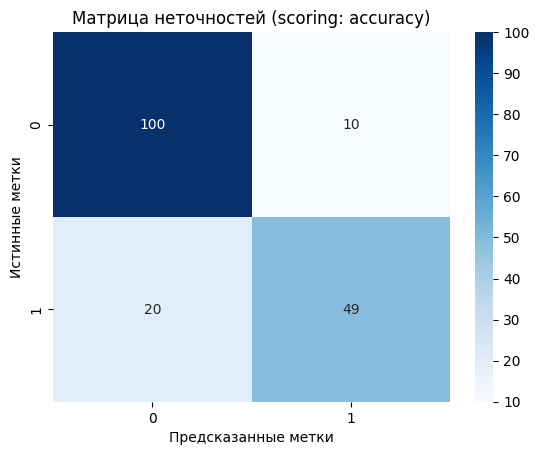

In [10]:
rf = RandomForestClassifier(random_state=0)
param_grid = [{'n_estimators': [75, 100, 150],
                'max_depth': [None, 10, 20, 30],
                'min_samples_split': [2, 5, 10],
                'min_samples_leaf': [1, 2, 4],
                'max_features': ['auto', 'sqrt', 'log2']}]
gs = GridSearchCV(estimator=rf,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=5,
                  n_jobs=-1)
gs = gs.fit(X_train, y_train)
print(f'best accuracy score = {gs.best_score_:.3f}')
print(f'best params: {gs.best_params_}')

clf = gs.best_estimator_
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
f1_score(y_test, y_pred)

rfa_accuracy = clf.score(X_test, y_test)
rfa_f1_score = f1_score(y_test, y_pred)
rfa_roc = roc_auc_score(y_test, y_pred)

print(f'accuracy = {rfa_accuracy:.3f}')
print(f'f1_score = {rfa_f1_score:.3f}')
print(f'roc_auc_score = {rfa_roc:.3f}')

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Предсказанные метки')
plt.ylabel('Истинные метки')
plt.title('Матрица неточностей (scoring: accuracy)')
plt.show()

c:\Users\nadys\Desktop\Projects\myenv\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
319 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\nadys\Desktop\Projects\myenv\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\nadys\Desktop\Projects\myenv\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "c:\Users\nadys\Desktop\Projects\myenv\Lib\site-packages\sklearn\base.py", line 436, in _validate_params
    validate_parameter_constrai

best accuracy score = 0.832
best params: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 75}
accuracy = 0.844
f1_score = 0.781
roc_auc_score = 0.821


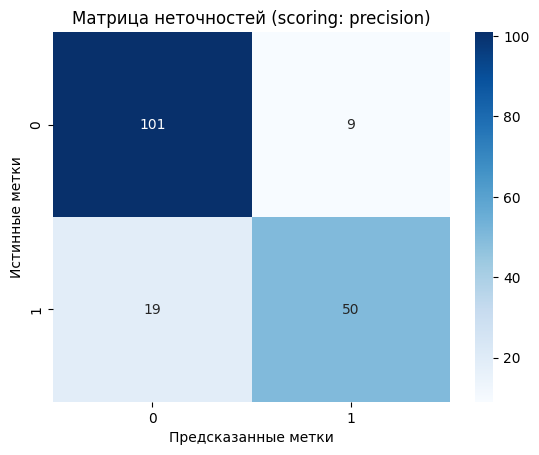

In [11]:
rf = RandomForestClassifier(random_state=0)
param_grid = [{'n_estimators': [75, 100, 150],
                'max_depth': [None, 10, 20, 30],
                'min_samples_split': [2, 5, 10],
                'min_samples_leaf': [1, 2, 4],
                'max_features': ['auto', 'sqrt', 'log2']}]
gs = GridSearchCV(estimator=rf,
                  param_grid=param_grid,
                  scoring='precision',
                  cv=5,
                  n_jobs=-1)
gs = gs.fit(X_train, y_train)
print(f'best accuracy score = {gs.best_score_:.3f}')
print(f'best params: {gs.best_params_}')

clf = gs.best_estimator_
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
f1_score(y_test, y_pred)

rfp_accuracy = clf.score(X_test, y_test)
rfp_f1_score = f1_score(y_test, y_pred)
rfp_roc = roc_auc_score(y_test, y_pred)

print(f'accuracy = {rfp_accuracy:.3f}')
print(f'f1_score = {rfp_f1_score:.3f}')
print(f'roc_auc_score = {rfp_roc:.3f}')

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Предсказанные метки')
plt.ylabel('Истинные метки')
plt.title('Матрица неточностей (scoring: precision)')
plt.show()

c:\Users\nadys\Desktop\Projects\myenv\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
414 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\nadys\Desktop\Projects\myenv\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\nadys\Desktop\Projects\myenv\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "c:\Users\nadys\Desktop\Projects\myenv\Lib\site-packages\sklearn\base.py", line 436, in _validate_params
    validate_parameter_constrai

best accuracy score = 0.703
best params: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
accuracy = 0.844
f1_score = 0.797
roc_auc_score = 0.835


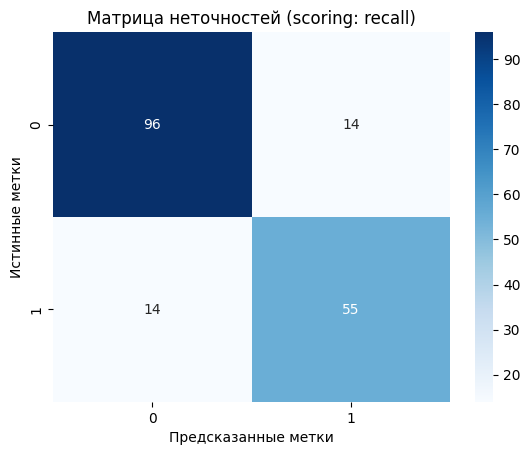

In [12]:
rf = RandomForestClassifier(random_state=0)
param_grid = [{'n_estimators': [75, 100, 150],
                'max_depth': [None, 10, 20, 30],
                'min_samples_split': [2, 5, 10],
                'min_samples_leaf': [1, 2, 4],
                'max_features': ['auto', 'sqrt', 'log2']}]
gs = GridSearchCV(estimator=rf,
                  param_grid=param_grid,
                  scoring='recall',
                  cv=5,
                  n_jobs=-1)
gs = gs.fit(X_train, y_train)
print(f'best accuracy score = {gs.best_score_:.3f}')
print(f'best params: {gs.best_params_}')

clf = gs.best_estimator_
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
f1_score(y_test, y_pred)

rfr_accuracy = clf.score(X_test, y_test)
rfr_f1_score = f1_score(y_test, y_pred)
rfr_roc = roc_auc_score(y_test, y_pred)

print(f'accuracy = {rfr_accuracy:.3f}')
print(f'f1_score = {rfr_f1_score:.3f}')
print(f'roc_auc_score = {rfr_roc:.3f}')

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Предсказанные метки')
plt.ylabel('Истинные метки')
plt.title('Матрица неточностей (scoring: recall)')
plt.show()

(0.7, 0.87)

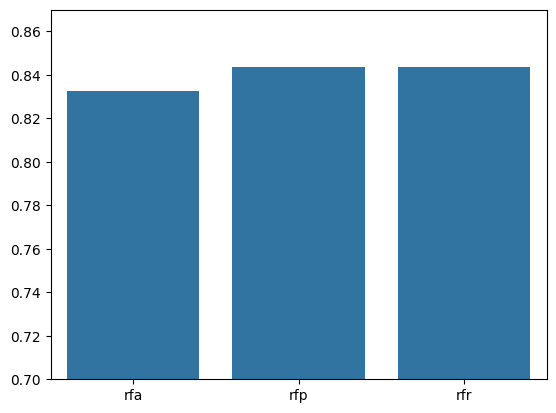

In [13]:
sns.barplot(x=['rfa', 'rfp', 'rfr'], y=[rfa_accuracy, rfp_accuracy, rfr_accuracy])
plt.ylim(0.7, 0.87)

(0.7, 0.8)

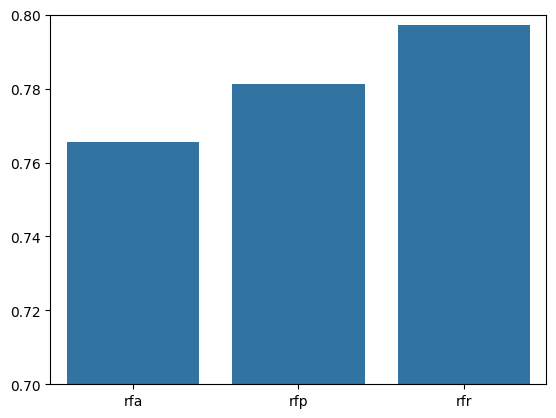

In [14]:
sns.barplot(x=['rfa', 'rfp', 'rfr'], y=[rfa_f1_score, rfp_f1_score, rfr_f1_score])
plt.ylim(0.7, 0.8)

(0.76, 0.85)

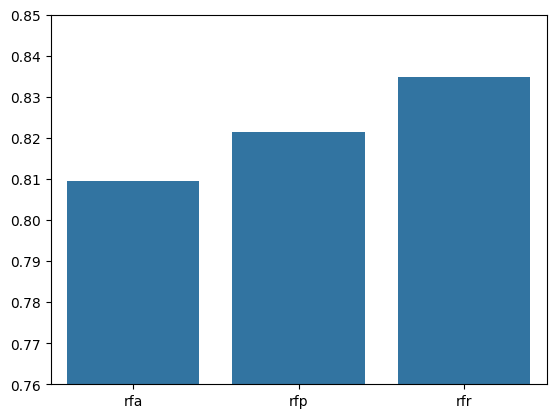

In [15]:
sns.barplot(x=['rfa', 'rfp', 'rfr'], y=[rfa_roc, rfp_roc, rfr_roc])
plt.ylim(0.76, 0.85)